# High - Dimensional Data

### when P is much bigger than N

 Such problems have become of increasing importance, especially in
genomics and other areas of computational biology.

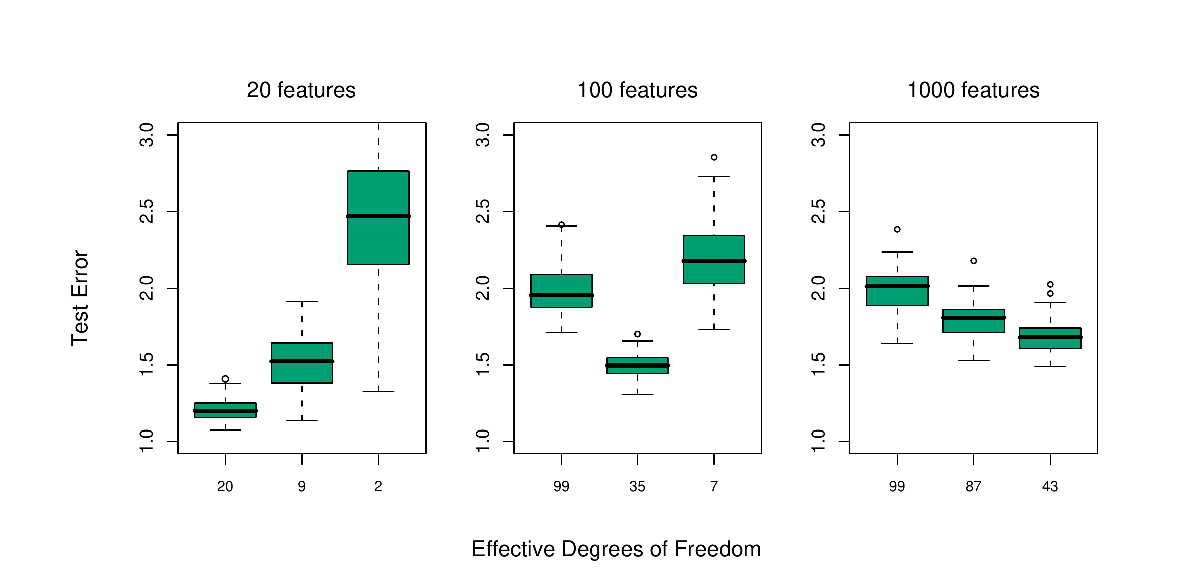

first column in plot is $\lambda = 0.001$ and second $\lambda = 100 $ and third $\lambda = 1000 $ for each plot. 
The degrees of freedom is a more interpretable parameter than $\lambda$. When $\lambda = 0.001$ , this
is nearly the same as least squares regression, with a little regularization
just to ensure that the problem is non-singular when p > N.

### Figure:

We see that ridge regression with $\lambda = 0.001 $ (20 df) wins when p = 20;
$\lambda= 100$ (35 df) wins when $p = 100$, and $\lambda = 1000$ (43 df) wins when
p = 1000.
Here is an explanation for these results. When p = 20, we fit all the way
and we can identify as many of the significant coefficients as possible with low bias.
When p = 100, we can identify some non-zero coefficients using
moderate shrinkage. Finally, when p = 1000, even though there are many
nonzero coefficients, we don’t have a hope for finding them and we need to shrink all the way  down.

#### Ridge regression works when P < N
Ridge regression with $\lambda$ = 0.001 successfully exploits the correlation in
the features when p < N , but cannot do so when p ≫ N .

 In the latter case
there is not enough information in the relatively small number of samples
to efficiently estimate the high-dimensional covariance matrix. In that case,
more regularization leads to superior prediction performance.


__________________________________________________________________________________________________________

Thus it is not surprising that the analysis of high-dimensional data requires either modification of procedures designed for the N > p scenario, or
entirely new procedures. 

# Diagonal Linear Discriminant Analysis

The simplest form of regularization
assumes that the features are independent within each class, that is, the
within-class covariance matrix is diagonal. Despite the fact that features
will rarely be independent within a class, when p ≫ N we don’t have enough data to estimate their dependencies. The assumption of independence greatly reduces the number of parameters in the model and often
results in an effective and interpretable classifier. 

 The assumption of independence greatly reduces the number of parameters in the model and often
results in an effective and interpretable classifier. It assumes that the
features in each class have independent Gaussian distributions with the
same variance. It is also a special case of the
naive-Bayes classifier

#### Rule: classify to highest discriminant value.
### Drawback of LDA

all features are in the model ,hence, it is difficult to use in interpretations.
 
 
 
 
### With further regularization we can do better—both in terms of test error and interpretability.




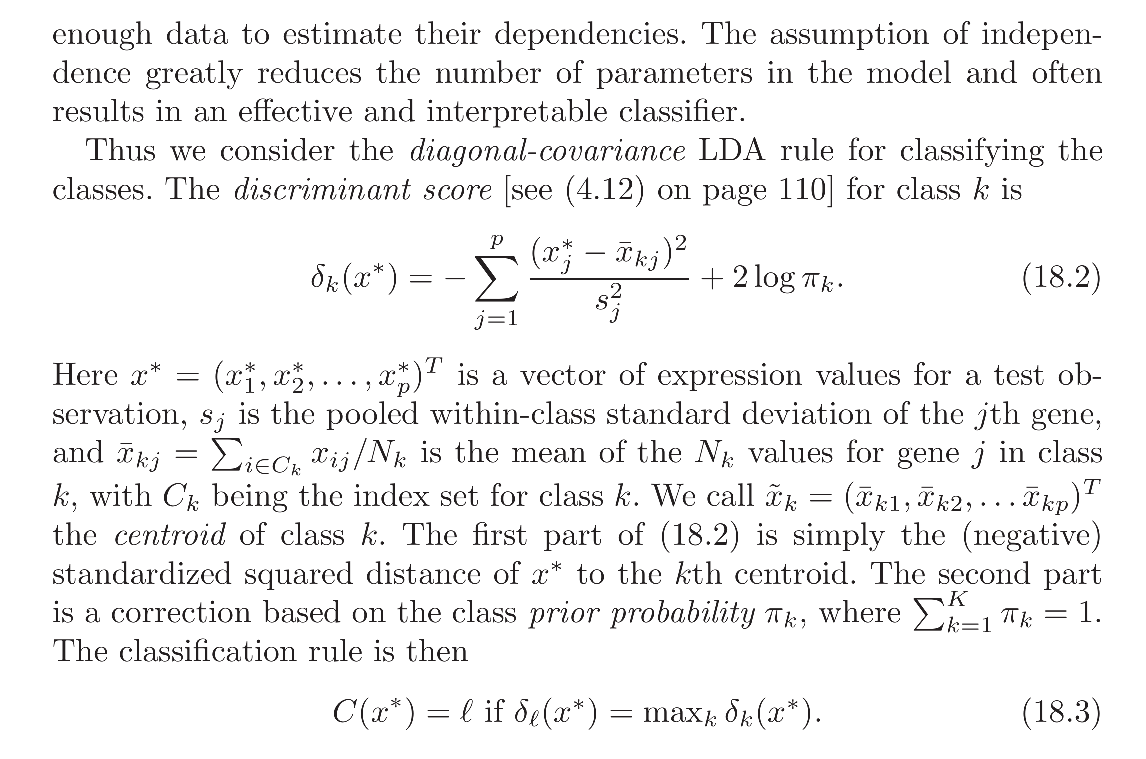

## Nearest Shrunken Centroid

We would like to regularize in a way that automatically drops out features that are not contributing to the class predictions.

We can do this
by shrinking the classwise mean toward the overall mean, for each feature
separately. 

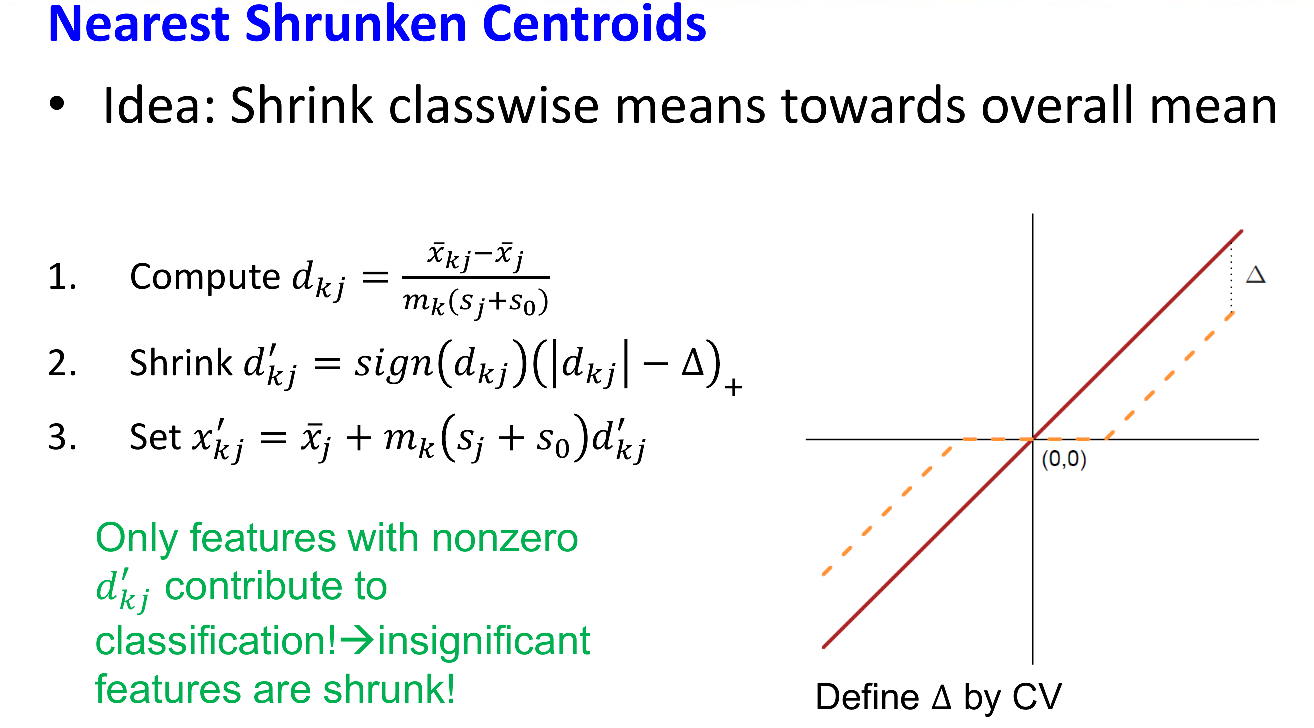

$s_j$ is pooled within classifier.

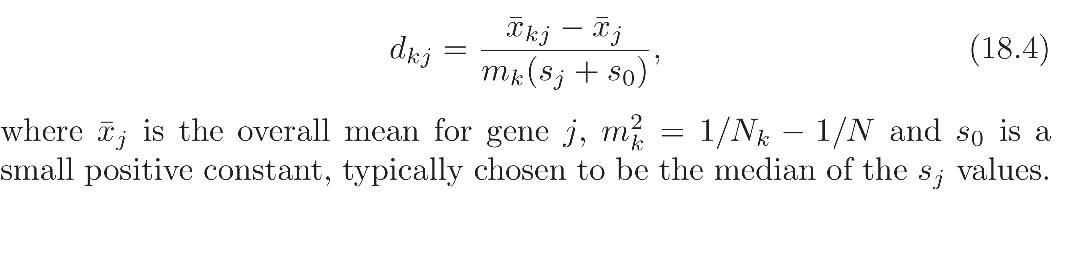

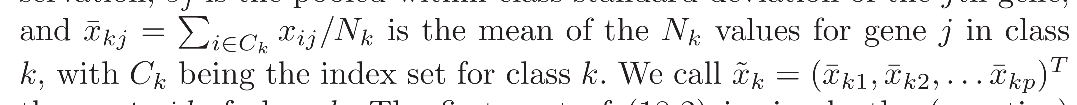

_________________________________________________________________________________________________________

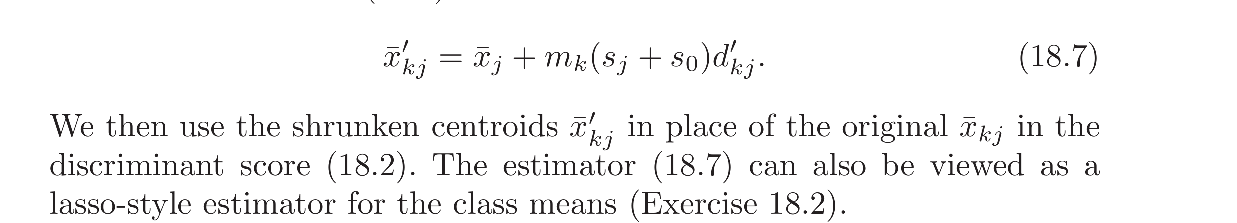
The estimator (18.7) can also be viewed as a
lasso-style estimator for the class means (Exercise 18.2)

________________________________________________________________________________

Notice that only the genes that have a nonzero d′ for at least one of the
kjclasses play a role in the classification rule, and hence the vast majority
of genes can often be discarded

In [1]:
 #Package pamr
# – pamr.train()
# – pamr.cv
data0=read.csv2("voice.csv")
data=data0
data=as.data.frame(scale(data))
data$Quality=as.factor(data0$Quality)
library(pamr)
rownames(data)=1:nrow(data)
x=t(data[,-311])
y=data[[311]]
mydata=list(x=x,y=as.factor(y),geneid=as.character(1:nrow(x)), genenames=rownames(x))
model=pamr.train(mydata,threshold=seq(0,4, 0.1))
pamr.plotcen(model, mydata, threshold=1)
pamr.plotcen(model, mydata, threshold=2.5)
a=pamr.listgenes(model,mydata,threshold=2.5)
cat( paste( colnames(data)[as.numeric(a[,1])], collapse='\n' ) )
cvmodel=pamr.cv(model,mydata)
print(cvmodel)
pamr.plotcv(cvmodel)


Warning message in file(file, "rt"):
“cannot open file 'voice.csv': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


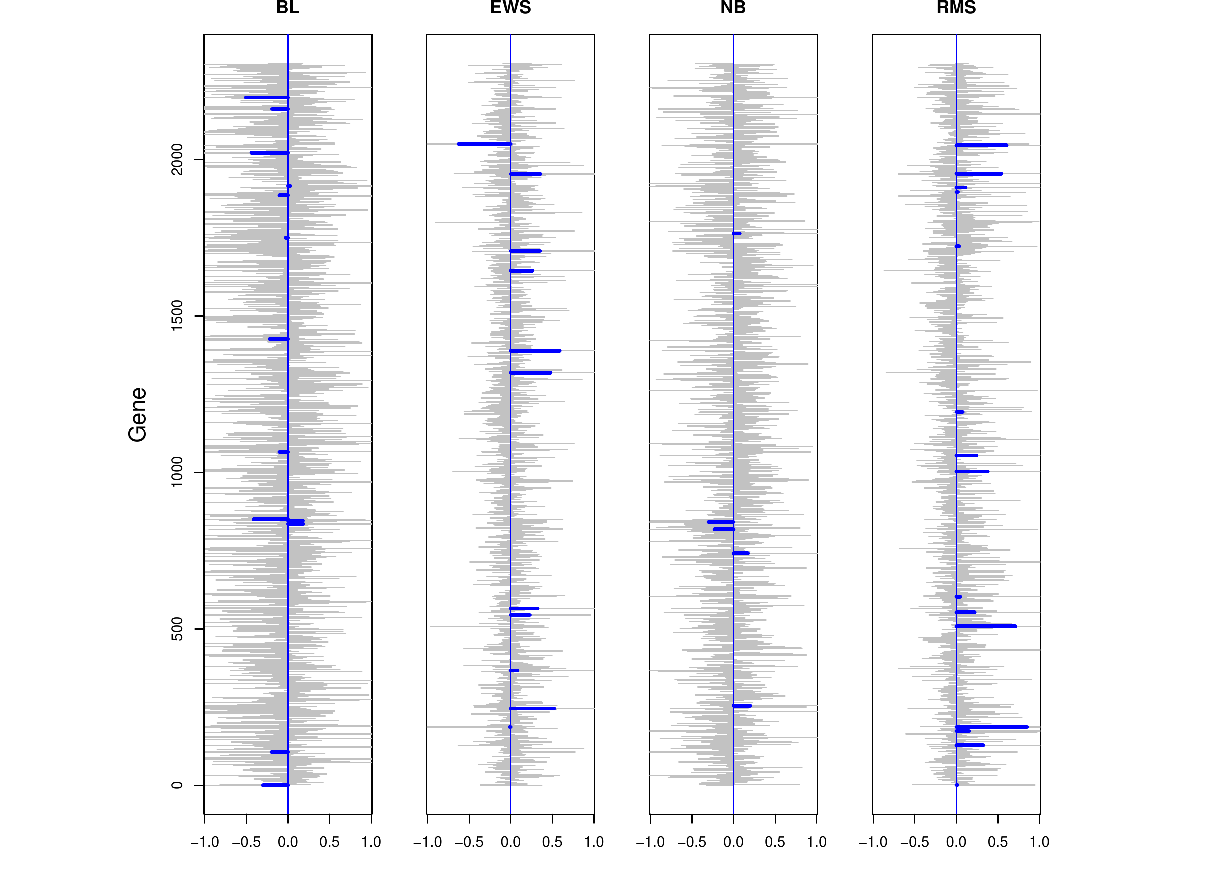

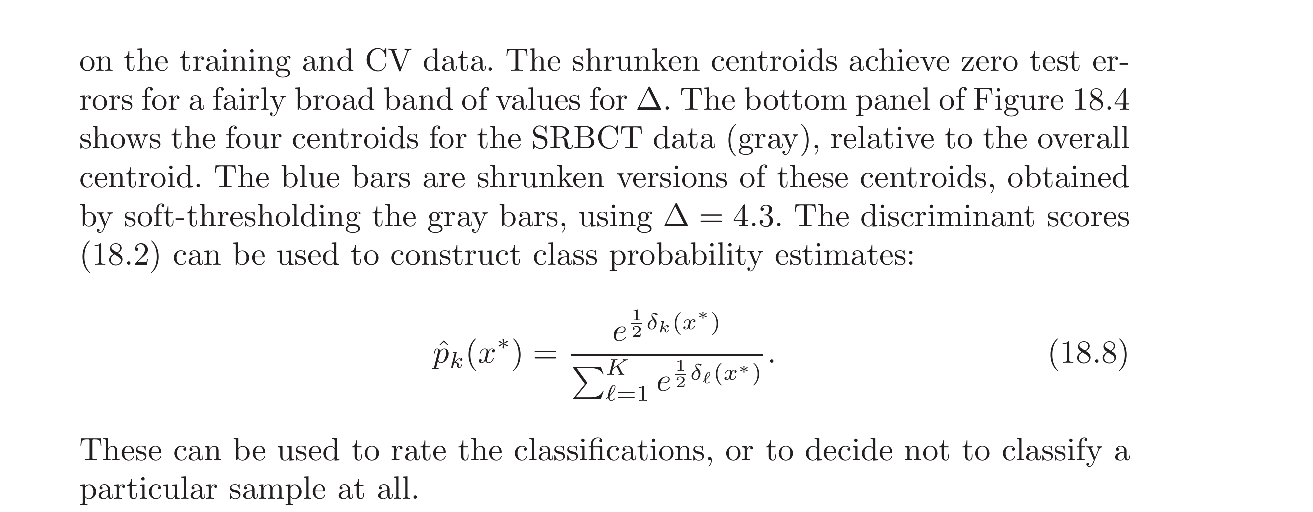

# RDA

# 
## γγ R: rda() in klaR
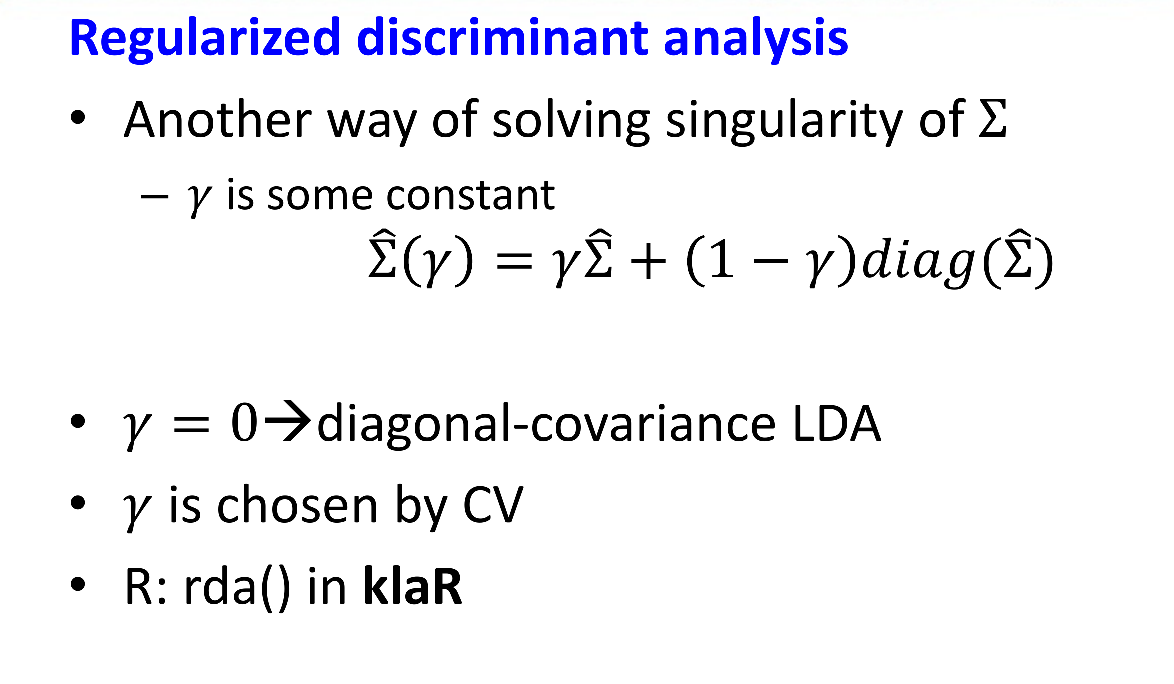|

# Regularized logistic regression

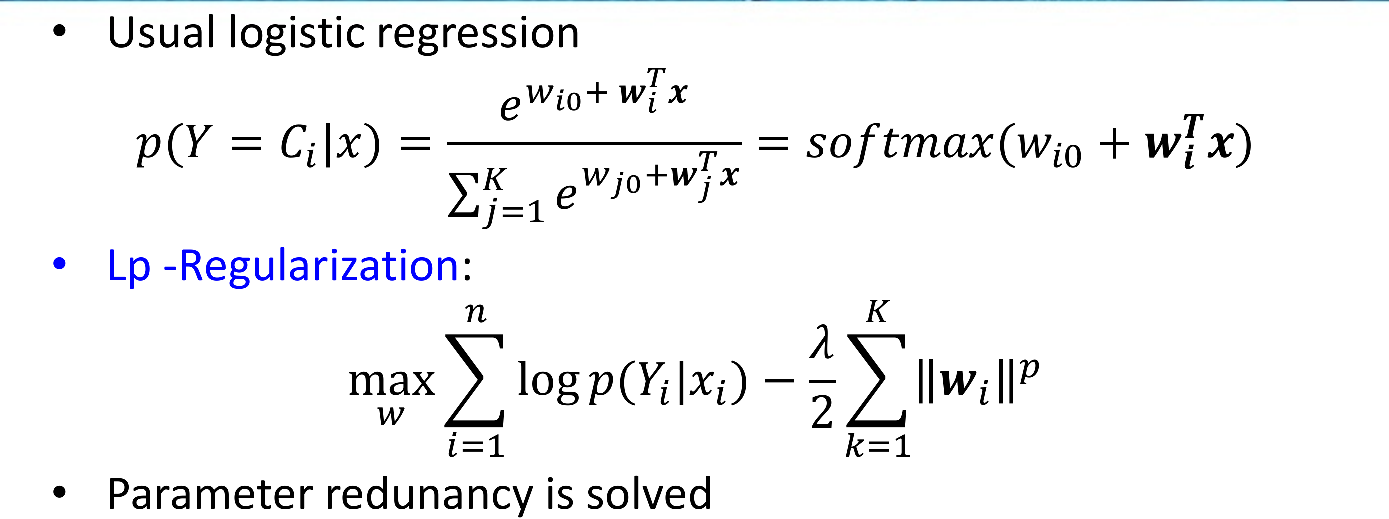

- L1 regularization: some w are shrunk to 0
- Numerical optimization is used to solve
- R: LiblineaR() in package LiblineaR


# SVM

Support  Vector margin Machine do not suffer from p >> n
if the data from is perfectly
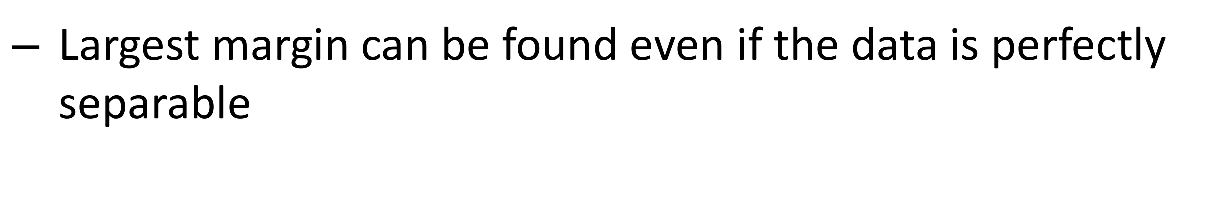


# Elastic Net



may select more than N feature
in R: glmnet() package

– Specify ”family” for classification or regression

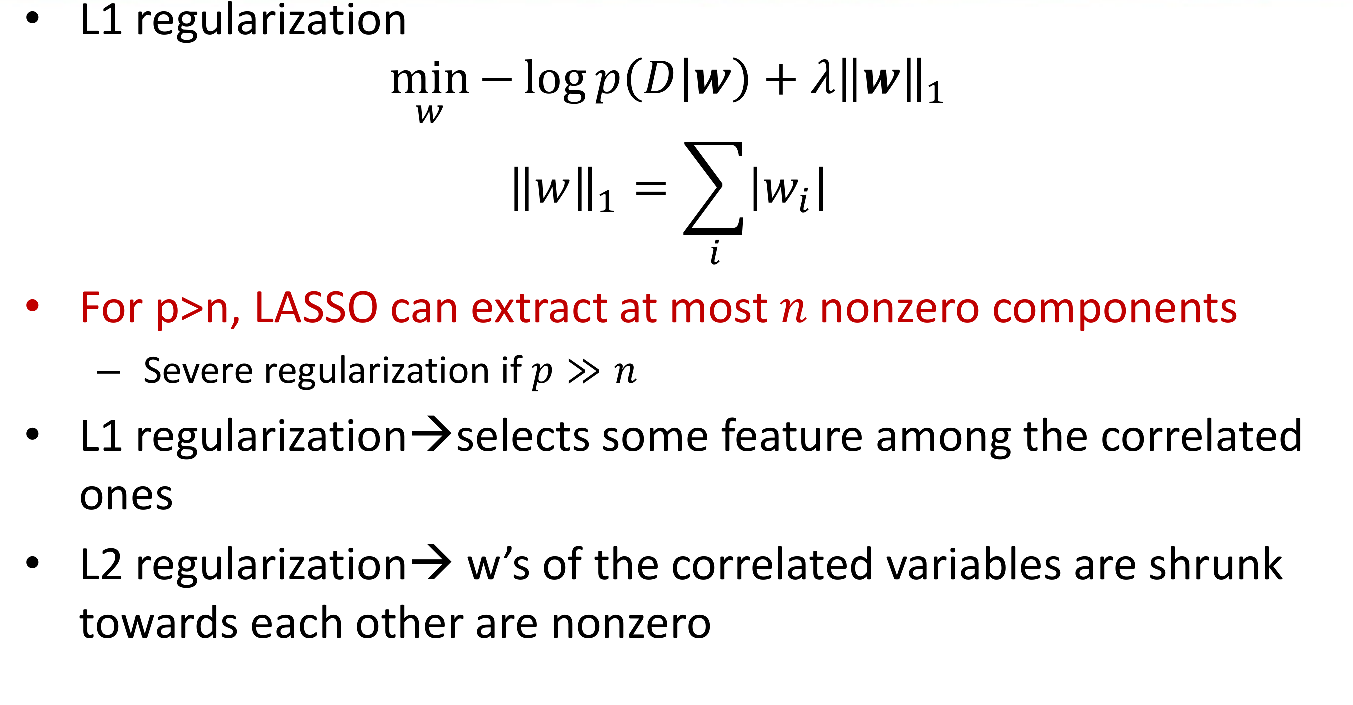


## Questions which methods are capable of extracting more than n features when n << p?

My answer: SVM, Elastic Net.

# when features are not available
### Kernel PCA




In [2]:
library(kernlab)
K <- as.kernelMatrix(crossprod(t(x)))
res=kpca(K)
barplot(res@eig)
plot(res@rotated[,1], res@rotated[,2], xlab="PC1",
ylab="PC2")

ERROR: Error in t(x): object 'x' not found


# Feature assessment


•Which features are important?

– Ex: Which protein values differ between normal and
cancer samples

•P-values in our predictive models can not be
computed (too few observations)

•  Traditional hypothesis testing is used


## Lab

Assignment 3. High-dimensional methods

Data file geneexp.csv contains information about gene expression of three different cell types (column Cell Type). These cell types are CD4 and CD8 (two sorts of T cells) and CD19 (B cells). The aim of this assignment is to classify cells to the appropriate cell types using gene expressions and discover relevant genes for the given cell types.

    1. Divide data into training and test sets (70/30) without scaling. Perform nearest shrunken centroid classification of training data in which the threshold is chosen by cross-validation. Provide a centroid plot and interpret it. How many genes were selected by the method? What meaning do positive and negative values have in the centroid plot? Can it happen that all values in the centroid plot are positive for some gene?
    2. List the names of the 2 most contributing genes and find their alternative names in Google. Then, by checking this webpage https://panglaodb.se/markers.html  find out whether these two genes are “marker genes” for given cell types. Report the test error of the model.
    3. Compute the test error and the number of the contributing features for the following methods fitted to the training data:
        a. Elastic net with the binomial response and  in which penalty is selected by the cross-validation
        b. Support vector machine with “vanilladot” kernel.
Compare the results of these models with the results of the nearest shrunken centroids (make a comparative table). Which model would you prefer and why?
    4. Implement Benjamini-Hochberg method for the original data in which you test each cell type versus the remaining ones, and use t.test() for computing p-values. Present plots showing p-values and the rejection area for each cell type and interpret them. How many genes correspond to the rejected hypotheses for each cell type? 


In [3]:
set.seed(12345)
data = read.csv("geneexp.csv")
data0 = data[,-1] # removing the column that is the Cell ID
#split data to train and test set
# x=300 , p=2087

trainrate = 0.7 
n = dim(data)[1]
ind = sample(1:n,floor(trainrate*n))
train = data[ind,]
test = data[-ind,]
y = train[,ncol(train)]
x = t(train[,-c(1,ncol(train))])

# Training and cross-validating threshold
# Library for NSC is pamr
library(pamr)
# we should create a list
mydata=list(x=x,y=as.factor(y),geneid=as.character(1:nrow(x)), genenames=rownames(x))
model=pamr.train(mydata,threshold=seq(0,40, 0.1))
cvmodel = pamr.cv(fit = model,data = mydata)
#dev.new()



Loading required package: cluster
Loading required package: survival


1234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980818283848586878889909192939495969798991001011021031041051061071081091101111121131141151161171181191201211221231241251261271281291301311321331341351361371381391401411421431441451461471481491501511521531541551561571581591601611621631641651661671681691701711721731741751761771781791801811821831841851861871881891901911921931941951961971981992002012022032042052062072082092102112122132142152162172182192202212222232242252262272282292302312322332342352362372382392402412422432442452462472482492502512522532542552562572582592602612622632642652662672682692702712722732742752762772782792802812822832842852862872882892902912922932942952962972982993003013023033043053063073083093103113123133143153163173183193203213223233243253263273283293303313323333343353363373383393403413423433443453463473483493503513523533543553563573583593603613623633643653663673683693

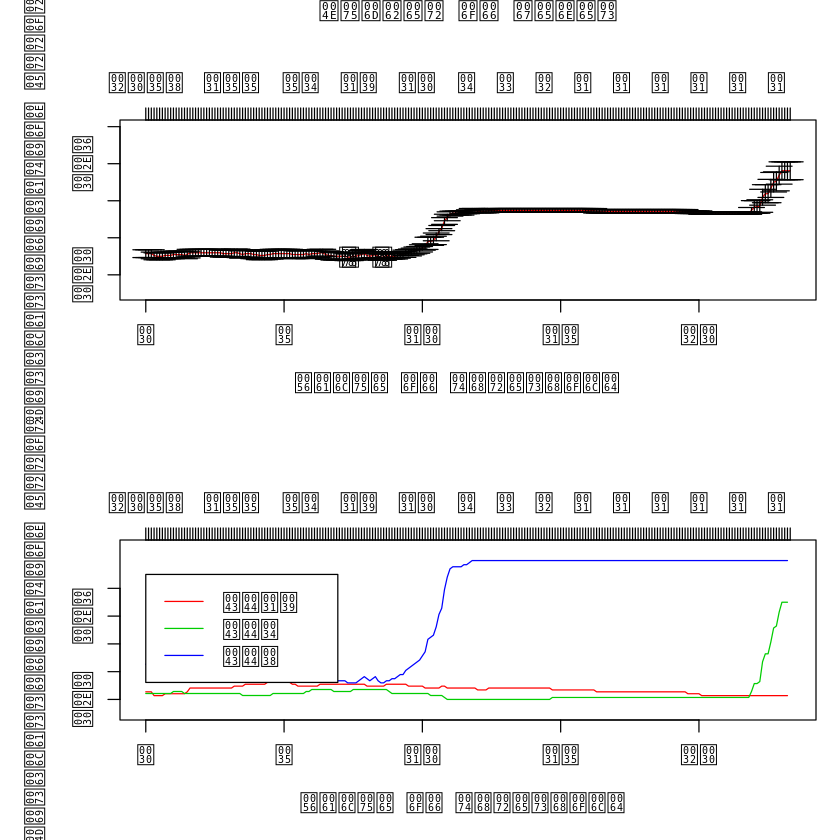

In [4]:
pamr.plotcv(cvmodel)


1

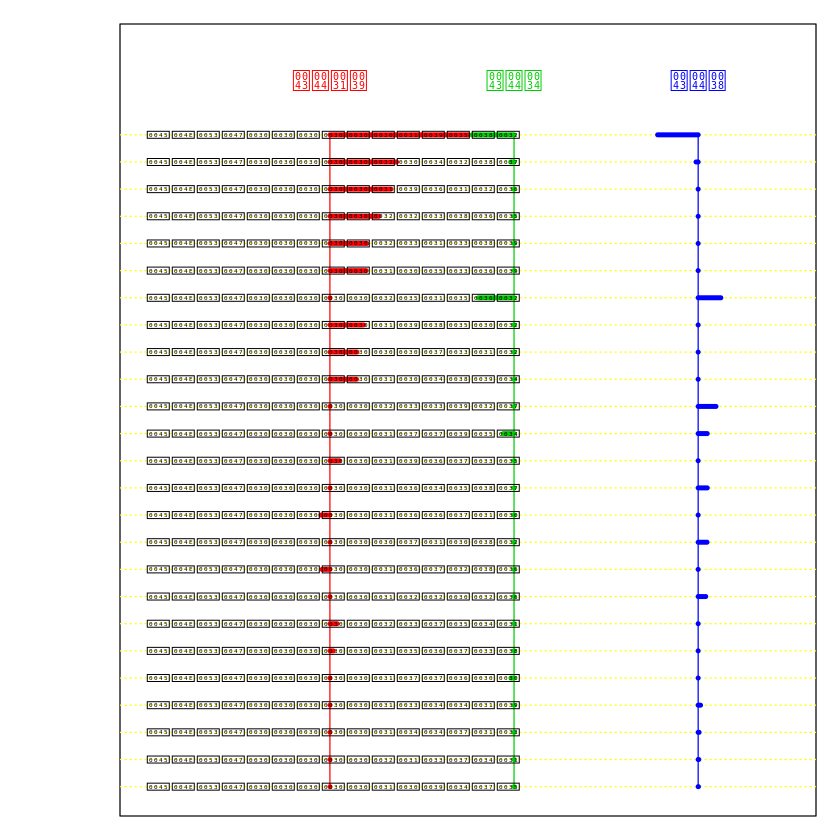

In [5]:

best.threshold=cvmodel$threshold[which.min(cvmodel$error)]
best.model = pamr.train(mydata,threshold = best.threshold)
pamr.plotcen(best.model, mydata,threshold = best.threshold)

In [6]:


# How many genes were selected by the method?

selectedGenes = pamr.listgenes(fit = best.model,data = mydata,
                               threshold = best.threshold,genenames = TRUE)
 
#the name of the selected genes
cat(paste(colnames(data0[as.numeric(selectedGenes[,1])]),collapse = '\n'))


num_selected_genes = length(unique(selectedGenes[,2]))




      id  name            CD19-score CD4-score CD8-score
 [1,] 2   ENSG00000019582 1.507      -0.4532   -0.4401  
 [2,] 15  ENSG00000204287 0.7245     -0.0363   -0.0232  
 [3,] 31  ENSG00000196126 0.6633     -0.002    0        
 [4,] 32  ENSG00000223865 0.5321     0         0        
 [5,] 37  ENSG00000231389 0.4006     0         0        
 [6,] 138 ENSG00000105369 0.3937     0         0        
 [7,] 1   ENSG00000251562 0          -0.3848   0.2465   
 [8,] 90  ENSG00000198502 0.3645     0         0        
 [9,] 172 ENSG00000007312 0.2933     0         0        
[10,] 126 ENSG00000104894 0.2892     0         0        
[11,] 79  ENSG00000233927 0          0         0.194    
[12,] 11  ENSG00000177954 0          -0.1154   0.0986   
[13,] 110 ENSG00000196735 0.1027     0         0        
[14,] 21  ENSG00000164587 0          0         0.0991   
[15,] 3   ENSG00000166710 -0.0974    0         0        
[16,] 50  ENSG00000071082 0          0         0.0963   
[17,] 207 ENSG00000167286 -0.08

In [7]:
cat('\n num_selected_genes\n',num_selected_genes)



 num_selected_genes
 25

In [8]:
##########################################
########## 3.2 ##########################
#########################################


# 2 most contributing genes : selected genes are Ordered by the score , 
# so we just take the first two
print(selectedGenes[1:2,2])
# 
print(length(unique(selectedGenes)))
Nsc_select = length(unique(selectedGenes))
cat("the name ENSG00000204287 Gene is  HLA-DRA and this gene is a marker. ","\n")
cat("The name of ENSG00000019582 Gene is CD74 and this gene is a marker.")
# Report the test error of the model.

xtest = t(test[,-c(1,ncol(test))])
predict.Class = pamr.predict(fit = best.model,newx = xtest,threshold = best.threshold)

ytest = as.factor(test[,ncol(test)])

cat('miss-classification error \n')
table(ytest,predict.Class )

print(1 - sum(diag(table(ytest,predict.Class )))/length(predict.Class))
NSCErr = 1 - sum(diag(table(ytest,predict.Class )))/length(predict.Class)


[1] "ENSG00000019582" "ENSG00000204287"
[1] 125
the name ENSG00000204287 Gene is  HLA-DRA and this gene is a marker.  
The name of ENSG00000019582 Gene is CD74 and this gene is a marker.miss-classification error 


      predict.Class
ytest  CD19 CD4 CD8
  CD19   27   0   0
  CD4     0  26   4
  CD8     0   6  27

[1] 0.1111111


In [9]:
#centroid plot shows the distance from the selected gene mean value to the global mean value. positive means
# that the gene is greater than global mean and negative means that the gene is smaller than the global mean
# value as a result they can not all be positive for all the genes.


#############################################################
###################### 3.3 ##################################
#############################################################


# elastic net in glmnet package

library(glmnet)

x = as.matrix(train[, -c(1,dim(train)[2])])
y = as.matrix(train[,dim(train)[2]])

set.seed(12345)
cvElasticnetModel = cv.glmnet(x = x ,y = y ,
                              type.measure = "mse" ,
                              family = "multinomial",alpha = 0.5)
dev.new()
plot(cvElasticnetModel)

# now it is time for prediction

xtest = as.matrix(test[,-c(1,dim(test)[2])])
ytest = as.matrix(test[,dim(test)[2]])

#s - Value(s) of the penalty parameter lambda at which predictions are required. 
#Default is the entire sequence used to create the model.

ElasticNet.pred.class = predict(cvElasticnetModel,
                                newx = xtest,type = 'class', s = 'lambda.min' )

table(ytest, ElasticNet.pred.class)

print("the MSE error For Elastic Net")
1- sum(diag(table(ytest, ElasticNet.pred.class))/length(ytest))
ElastErr = 1- sum(diag(table(ytest, ElasticNet.pred.class))/length(ytest))
## number of contributing genes:

coeffs <- coef(cvElasticnetModel)
# nonzeroCoeffsCD19 <- coeffs[which(coeffs$CD19 != 0)]
# selectedCoeffsCD19 <- length(nonzeroCoeffsCD19)
# 
# nonzeroCoeffsCD4 <- coeffs[which(coeffs$CD4 != 0)]
# selectedCoeffsCD4 <- length(nonzeroCoeffsCD4)
# 
# nonzeroCoeffsCD8 <- coeffs[which(coeffs$CD8 != 0)]
# selectedCoeffsCD8 <- length(nonzeroCoeffsCD8 )
# cat("Elasticnet model has ", selectedCoeffsCD4, " nonzero coefficients for CD4\n")
# cat("Elasticnet model has ", selectedCoeffsCD19, " nonzero coefficients for CD19\n")
# cat("Elasticnet model has ", selectedCoeffsCD8, " nonzero coefficients for CD8\n")

cat("Elasticnet model has ", sum(coeffs$CD4 != 0), " nonzero coefficients for CD4\n")
cat("Elasticnet model has ", sum(coeffs$CD19 != 0), " nonzero coefficients for CD19\n")
cat("Elasticnet model has ", sum(coeffs$CD8 != 0), " nonzero coefficients for CD8\n")

ElastNet_selected_genes = unique(c(coeffs$CD4@i,coeffs$CD8@i,coeffs$CD19@i))
#total_num_Selected_genes = length(coeffs$CD4@x) +  length(coeffs$CD8@x) + length(coeffs$CD19@x)

#some Genes might be seleceted for both class
cat('total Number of Selected genes',length(ElastNet_selected_genes),"\n") 
####################################################

# 3.3 b: svm

# Support vector machine with “vanilladot” kernel.\

library(kernlab)

train$CellType = as.factor(train$CellType)

#this part is not necessary
for(i in 2:2085){
  train[,i] = as.numeric(train[,i])
}

SvmModel = ksvm(CellType ~. ,data = train[,-1],  
                kernel="vanilladot" , scaled=FALSE)

table(ytest,predict(SvmModel,xtest))

SvmErr = 1 - sum(diag(table(ytest,
                            predict(SvmModel,xtest)))/length(ytest))
SvmSelect = dim(xtest)[2] 



cat('SVM ERROR \n',
    1 - sum(diag(table(ytest,
                       predict(SvmModel,xtest)))/length(ytest)))


cat("\n the number of selected feature in svm:",ncol(train[,-1])-1)

Error = data.frame('NSC-Error' = round(NSCErr,3),
                   'Elastic-Net' = round(ElastErr,3),
                   'Svm-Erorr' = round(SvmErr,3))
print(Error)

Selected_feature = data.frame("NSC" = Nsc_select,
                              'Elastic-Net' = num_selected_genes,
                              'Svm' = SvmSelect)
print(Selected_feature)





Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



      ElasticNet.pred.class
ytest  CD19 CD4 CD8
  CD19   27   0   0
  CD4     0  29   1
  CD8     1   3  29

[1] "the MSE error For Elastic Net"


[1] 0.05555556

Elasticnet model has  65  nonzero coefficients for CD4
Elasticnet model has  31  nonzero coefficients for CD19
Elasticnet model has  48  nonzero coefficients for CD8
total Number of Selected genes 128 
 Setting default kernel parameters  


      
ytest  CD19 CD4 CD8
  CD19   27   0   0
  CD4     0  30   0
  CD8     0   2  31

SVM ERROR 
 0.02222222
 the number of selected feature in svm: 2085  NSC.Error Elastic.Net Svm.Erorr
1     0.111       0.056     0.022
  NSC Elastic.Net  Svm
1 125          25 2085


 By comparison three different models, we can see the SVM has the lowest error rate compare
 two other models, but the this model select 2085 features for classifying three different classes. The
 error rate in Elastic net model is lower than NSC.but number of features in three classes are more than
 NSC. As the difference between error rate in NSC and Elastic net could be ignored, by considering
 number of features, NSC could be a good model for classification

In [10]:
################################################
#################### 3.4 #######################
################################################

# Implement Benjamini-Hochberg method for the original data in which you test each cell 
# type versus the remaining ones, and use t.test() for computing p-values.
# Present plots showing p-values and the rejection area for each cell type and 
# interpret them. How many genes correspond to the rejected hypotheses for each cell type? 
################################################
#################### 3.4 #######################
################################################

# Implement Benjamini-Hochberg method for the original data in which you test each cell 
# type versus the remaining ones, and use t.test() for computing p-values.
# Present plots showing p-values and the rejection area for each cell type and 
# interpret them. How many genes correspond to the rejected hypotheses for each cell type? 


data = read.csv("geneexp.csv")
#y <- as.factor(data[,ncol(data)])
#x <- as.matrix(data[,c(-1,-ncol(data))])

df = data[,-1]
y.CD4 <- ifelse(df$CellType=="CD4",yes=1,no=0)
y.CD8 <- ifelse(df$CellType=="CD8",yes=1,no=0)
y.CD19 <- ifelse(df$CellType=="CD19",yes = 1,no = 0)

#p-value with t.test

p_value_CD4 = sapply(1:(ncol(df)-1), function(i) t.test(df[,i] ~ y.CD4)$p.value)
p_value_CD8 = sapply(1:(ncol(df)-1), function(i) t.test(df[,i] ~ y.CD8)$p.value)
p_value_CD19 = sapply(1:(ncol(df)-1), function(i) t.test(df[,i] ~ y.CD19)$p.value)


#convert to data-frames
p_value_CD4 = na.omit(as.data.frame(p_value_CD4))
p_value_CD8 = na.omit(as.data.frame(p_value_CD8))
p_value_CD19 = na.omit(as.data.frame(p_value_CD19))



In [11]:
#sorting the value of p_values

p_value_CD4_sorted = sort(p_value_CD4$p_value_CD4)

p_value_CD8_sorted  = sort(p_value_CD8$p_value_CD8)

p_value_CD19_sorted  = sort(p_value_CD19$p_value_CD19)




In [13]:
##### L= max{j:p(j) < alpha * j/M}
get_p_rej <- function(x,alpha = 0.05){
  l = 1
  while (x[l] < (alpha* l / length(x))) {
    l=l+1
  }
  L <- x[l]
  return(L)
}


 



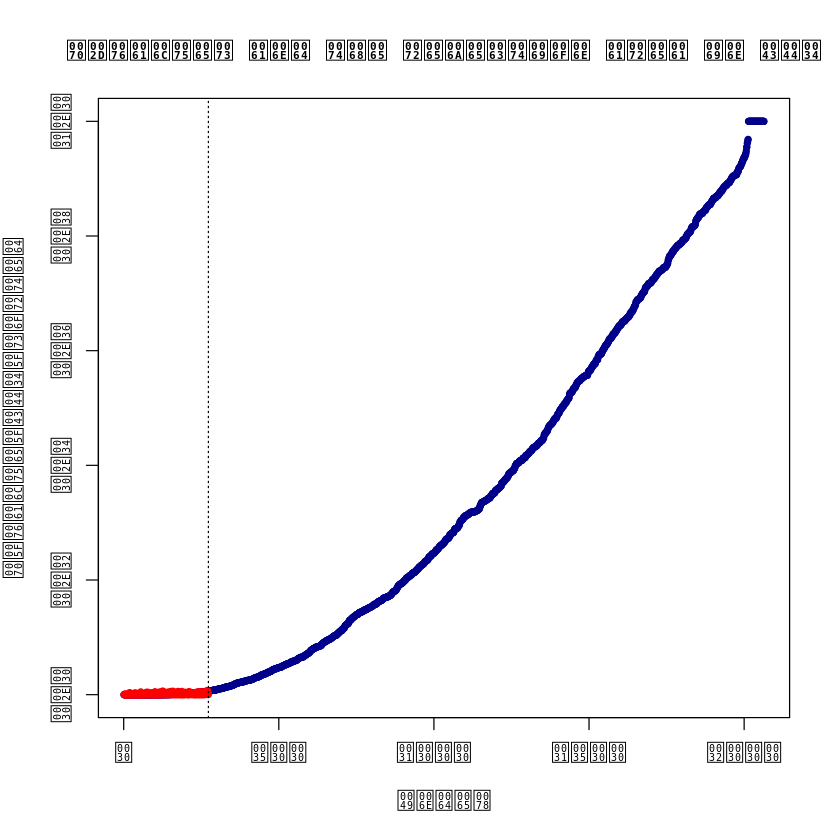

In [14]:
############### BH ####################

plot(p_value_CD4_sorted, main="p-values and the rejection area in CD4",col = 'darkblue',pch = 20)
points(p_value_CD4$p_value_CD4[which(p_value_CD4 < get_p_rej(p_value_CD4_sorted))],col= "red",pch = 20)

no_CD4 <-length(p_value_CD4$p_value_CD4[which(p_value_CD4 < get_p_rej(p_value_CD4_sorted))])

abline(v = no_CD4,lty = 3) 

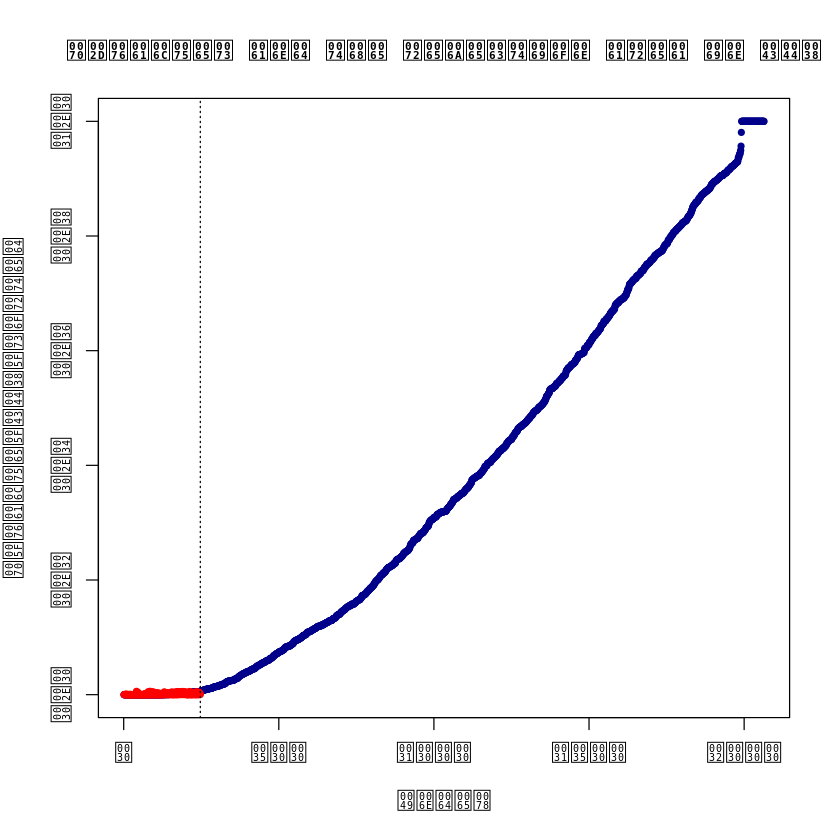

In [15]:
plot(p_value_CD8_sorted, main="p-values and the rejection area in CD8",col = 'darkblue',pch = 20)
points(p_value_CD8$p_value_CD8[which(p_value_CD8 < get_p_rej(p_value_CD8_sorted))],col= "red",pch = 20)

no_CD8 <-length(p_value_CD8$p_value_CD8[which(p_value_CD8 < get_p_rej(p_value_CD8_sorted))])
abline(v = no_CD8,lty = 3) 


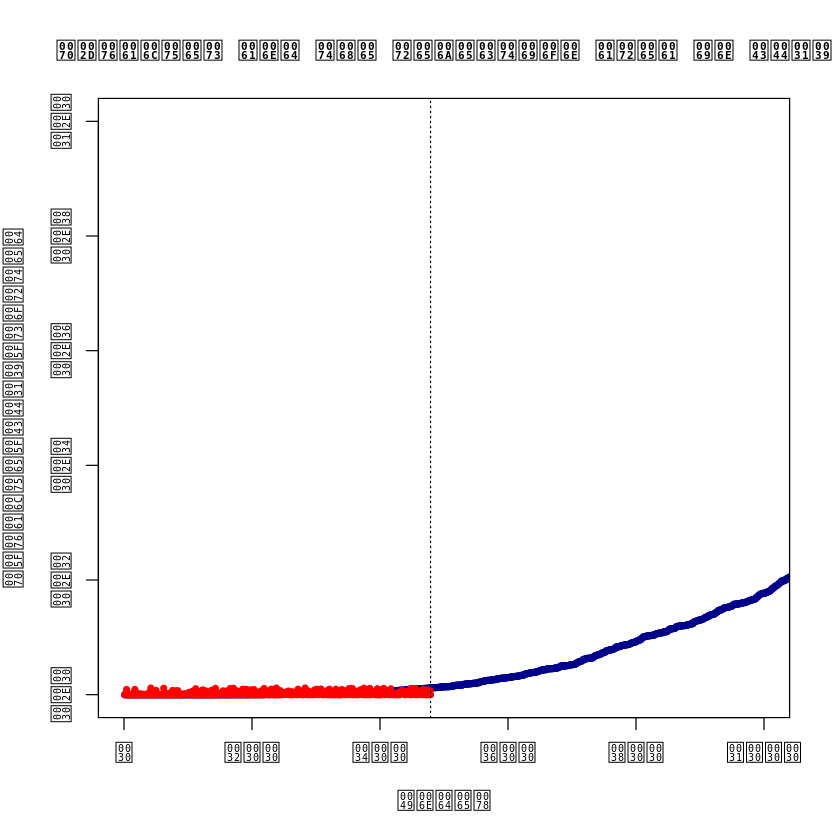

In [16]:

plot(p_value_CD19_sorted, main="p-values and the rejection area in CD19",col = 'darkblue',pch = 20,
     xlim = c(0,1000))
points(p_value_CD19$p_value_CD19[which(p_value_CD19 < get_p_rej(p_value_CD19_sorted))],col= "red",pch = 20)
no_CD19 <-length(p_value_CD19$p_value_CD19[which(p_value_CD19 < get_p_rej(p_value_CD19_sorted))])

L.CD19 = which.max(p_value_CD19$p_value_CD19[which(p_value_CD19 < get_p_rej(p_value_CD19_sorted))])
abline(v = no_CD19,lty = 3) 
#abline(a = 0.05*479/2085,b= 0,col='green')
# don't know how to plot the rejection line